## Regression using the embeddings

Regression means predicting a number, rather than one of the categories. We will predict the score based on the embedding of the review's text. We split the dataset into a training and a testing set for all of the following tasks, so we can realistically evaluate performance on unseen data. The dataset is created in the [Obtain_dataset Notebook](Obtain_dataset.ipynb).

We're predicting the score of the review, which is a number between 1 and 5 (1-star being negative and 5-star positive).

In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

datafile_path = "data/fine_food_reviews_with_embeddings_1k.csv"

df = pd.read_csv(datafile_path)
df["embedding"] = df.embedding.apply(eval).apply(np.array)

X_train, X_test, y_train, y_test = train_test_split(list(df.embedding.values), df.Score, test_size=0.2, random_state=42)

rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)
preds = rfr.predict(X_test)

mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)

print(f"ada-002 embedding performance on 1k Amazon reviews: mse={mse:.2f}, mae={mae:.2f}")


ada-002 embedding performance on 1k Amazon reviews: mse=0.64, mae=0.53


In [8]:
from sklearn.metrics.pairwise import cosine_similarity

In [20]:
# Get the cosine similarity between two embeddings

similarity = cosine_similarity([X_test[0]], [X_test[1]])

In [23]:
all_similarities.shape

(200, 200)

<Axes: >

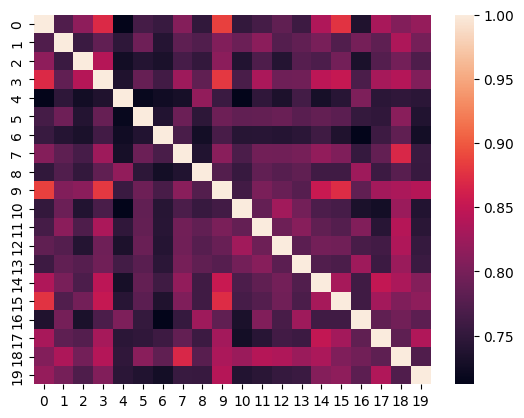

In [28]:
# Plot a heatmap of the similarities
sns.heatmap(all_similarities[:20, :20])

In [26]:
import seaborn as sns

In [ ]:

# Get indices of top 5 matches
top_5_indices = similarities.argsort(axis=0)[::-1][:5].flatten()

# Print texts of top 5 matches
for i in top_5_indices:
    print(df.loc[i, 'Text'])


In [6]:
df['Text'].iloc[0]

'Wanted to save some to bring to my Chicago family but my North Carolina family ate all 4 boxes before I could pack. These are excellent...could serve to anyone'

Calculate the mean squared error (mse) and mean absolute error (mae) of a dummy prediction on Amazon reviews. The dummy prediction involves predicting the same value (the mean of the test set) for each data point in the test set. 

In [2]:
bmse = mean_squared_error(y_test, np.repeat(y_test.mean(), len(y_test)))
bmae = mean_absolute_error(y_test, np.repeat(y_test.mean(), len(y_test)))
print(
    f"Dummy mean prediction performance on Amazon reviews: mse={bmse:.2f}, mae={bmae:.2f}"
)


Dummy mean prediction performance on Amazon reviews: mse=1.73, mae=1.03


We can see that the embeddings are able to predict the scores with an average error of 0.53 per score prediction. This is roughly equivalent to predicting half of reviews perfectly, and half off by one star.

You could also train a classifier to predict the label, or use the embeddings within an existing ML model to encode free text features.